# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import csv

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
cities_df = pd. DataFrame(cities)
df = cities_df.rename(columns={0:"Name"})
df.head()

,Name
0,warqla
1,hilo
2,gallup
3,malinao
4,amahai


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
print("Beginning Data Retrieval")
print("-----------------------------")

# Iterate trough the rows of the DataFrame, taking the name as the "Key" ans searching the weather of it. 
x = 1 
for index, row in df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
    # To obtain results in "imperial" system. If metric system wanted, then change units to "metric"
    units = "imperial"
    query_url = f"{base_url}appid={api_key}&units={units}&q="
    city = row['Name']
    response = requests.get(query_url + city).json()
    
    # Complete the DataFrame with the columns that we want. If there's any city whit lacking information, pass to the next
    try:    
         
        df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        df.loc[index,"Country"] = response["sys"]["country"]
        df.loc[index,"Date"] = response["dt"]
        df.loc[index,"Humidity"] = response["main"]["humidity"]
        df.loc[index, "Lat"] = response['coord']['lat']
        df.loc[index,"Lng"] = response["coord"]["lon"]
        df.loc[index,"Max Temp"] = response["main"]["temp_max"]
        df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        
        # !!!!!!!!!!!!!!!!!!! really need to find a better way. I tried with a counter ( x x+1) but in set 3 it failed. 
        if index < 50: 
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <100: 
            x = 2
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <150: 
            x = 3
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <200: 
            x = 4
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <250: 
            x = 5
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <300: 
            x = 6
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <350: 
            x = 7
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <400: 
            x = 8
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <450: 
            x = 9
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <500: 
            x = 10
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <550: 
            x = 11
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <600: 
            x = 12
            print(f"Processing Record {index} of Set {x} | {city}")
        elif index <650: 
            x = 13
            print(f"Processing Record {index} of Set {x} | {city}")
            

        
    except (KeyError, IndexError):
        pass
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | gallup
Processing Record 3 of Set 1 | malinao
Processing Record 4 of Set 1 | amahai
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | broken hill
Processing Record 10 of Set 1 | sur
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | muisne
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | sinnamary
Processing Record 22 of Set 1 | pemba
Processing Record 24 of Set 1 | saskylakh
Processing Record

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Summarize columns object count 
df.count()

Name          611
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [10]:
# Leave behing (dropping) all rows that has any of the columns 
df = df.dropna()

# Poer al ultimo!!!!!!!!!!!!!!!!!!!!!!!!!!!!Tranform column "Date" from exponential to integer 
df["Date"] = df["Date"].astype(int)

# Showing complete DataFrame
df.head()

,Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,hilo,90.0,US,1551378270,72.0,19.71,-155.08,63.00,3.36
2,gallup,1.0,US,1551376380,49.0,35.53,-108.74,50.00,10.29
3,malinao,56.0,PH,1551378568,91.0,11.64,122.31,72.83,3.94
4,amahai,64.0,ID,1551378526,84.0,-3.31,129.00,82.99,1.01
5,vaini,0.0,IN,1551378294,78.0,15.34,74.49,59.20,2.93


In [11]:
# Transform "Date" column from Unix into DayTime
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'],unit='s')

df.head()

,Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,hilo,90.0,US,2019-02-28 18:24:30,72.0,19.71,-155.08,63.00,3.36
2,gallup,1.0,US,2019-02-28 17:53:00,49.0,35.53,-108.74,50.00,10.29
3,malinao,56.0,PH,2019-02-28 18:29:28,91.0,11.64,122.31,72.83,3.94
4,amahai,64.0,ID,2019-02-28 18:28:46,84.0,-3.31,129.00,82.99,1.01
5,vaini,0.0,IN,2019-02-28 18:24:54,78.0,15.34,74.49,59.20,2.93


In [12]:
# Save Data into a csv
df.to_csv("WeatherPy.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

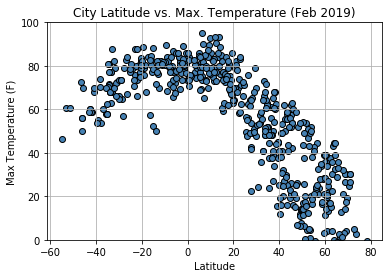

In [13]:
##Scarett plot Latitude vs. Max Temp 

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Max Temp"]

# Plot title and labels 
plt.title("City Latitude vs. Max. Temperature (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Limit the y axis 
plt.ylim(0, 100)

# Show Grid
plt.grid()

# Configure the plot
plt.scatter(x_axis, y_axis, marker="o", color="steelblue",edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Temperature Plot.png")

#Show plot 
plt.show()

#### Latitude vs. Humidity Plot

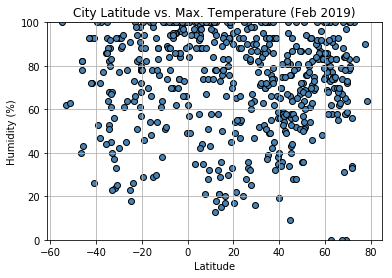

In [14]:
## Scarett plot Latitude vs. Humidity

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Humidity"]

# Plot title and labels 
plt.title("City Latitude vs. Max. Temperature (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Limit the y axis
plt.ylim(0, 100)

# Show Grid
plt.grid()

# Configure the plot
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Humidity Plot.png")

#Show plot 
plt.show()

In [15]:
#### Latitude vs. Cloudiness Plot

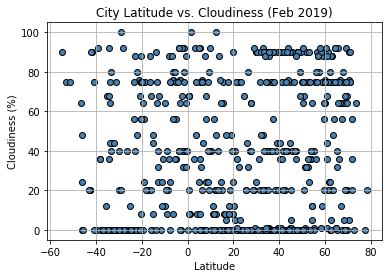

In [16]:
## Scarett plot Latitude vs. Cloudiness Plot

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Cloudiness"]

# Plot title and labels 
plt.title("City Latitude vs. Cloudiness (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show Grid
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Cloudiness Plot.png")

#Show plot 
plt.show()

#### Latitude vs. Wind Speed Plot

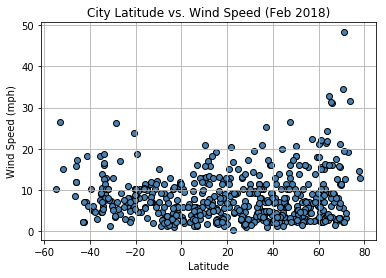

In [17]:
## Scarett plot Latitude vs. Wind Speed Plot

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Wind Speed"]

# Plot title and labels 
plt.title("City Latitude vs. Wind Speed (Feb 2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show Grid
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Wind Speed Plot.png")

#Show plot 
plt.show()

In [3]:
Date


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce